<a href="https://colab.research.google.com/github/katherymbr/tp1_RGB/blob/main/copia-PDI_TP2_Espacios_crom%C3%A1ticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

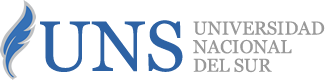

#PRÁCTICO NRO.2. PROCESAMIENTO DE IMÁGENES (PDI)

##**Parte 1: Manipulación de luminancia y saturación**
##**parte 2: Color y espacios cromáticos**




*NOMBRE: Katherym Bambague Ruíz*

---



###**OBJETIVO**
*    **PARTE 1**. La propuesta para esta actividad consiste en manipular independientemente la luminancia y la saturación de una imagen. Para ello convertimos cada pixel de la imagen del espacio RGB al espacio YIQ, luego alteramos los valores de Y (para cambiar la luminancia) y/o de IQ (para cambiar la saturación). Con los nuevos valores de YIQ, convertimos a RGB nuevamente y obtenemos una nueva imagen.


---


*   **PARTE 2**. La segunda parte del TP2 consiste en utilizar algunos datasets 2D (pueden ser mapas de altitud, de temperatura, etc.) y “visualizarlos” con diferentes paletas, incluyendo la de niveles de gris y la arco iris.









# PARTE 1

In [ ]:
# IMPORTO LAS LIBRERIAS

import matplotlib.pyplot as plt     #libreria para graficar
import numpy as np                  #libreria para operecaiones numéricas
import imageio                 #libreria para acceder a una imagen como matriz

<ipython-input-14-8b4f8ed8ebf6>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imagen= imageio.imread('/content/drive/MyDrive/crossfit3.jpg')


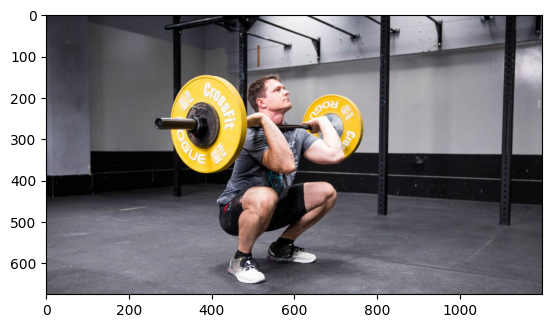

In [ ]:
# LEO LA IMAGEN

imagen= imageio.imread('/content/drive/MyDrive/crossfit3.jpg')
#imagen_original = np.copy(imagen).astype('float')
plt.imshow(imagen)


In [ ]:
 #INFORMACIÓN DE LA IMAGEN

print('Tamaño de la imagen',imagen.shape)
print('Tipo de archivo', imagen.dtype)


Tamaño de la imagen (675, 1200, 3)
Tipo de archivo uint8


CANAL R, CANAL G, CANAL B


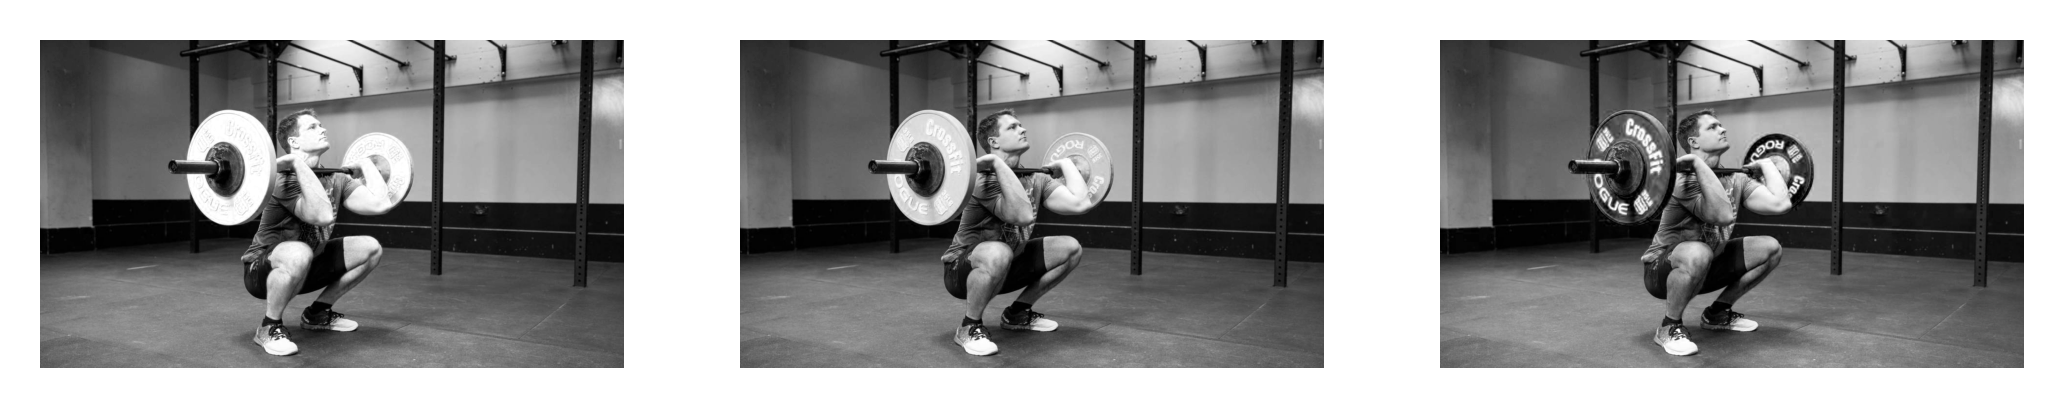

In [ ]:
# EXTRAEMOS LA IMAGEN EN LOS CANALES RGB

R=imagen[:,:,0]/255.0
G=imagen[:,:,1]/255.0
B=imagen[:,:,2]/255.0




fig, ax = plt.subplots(1, 3, dpi=400)
ax[0].imshow(R, cmap='gray')
ax[0].set_axis_off()
print('CANAL R, CANAL G, CANAL B')
ax[1].imshow(G, cmap='gray')
ax[1].set_axis_off()
ax[2].imshow(B, cmap='gray')
ax[2].set_axis_off()
plt.show()


ESPACIO Y, ESPACIO I, ESPACIO Q


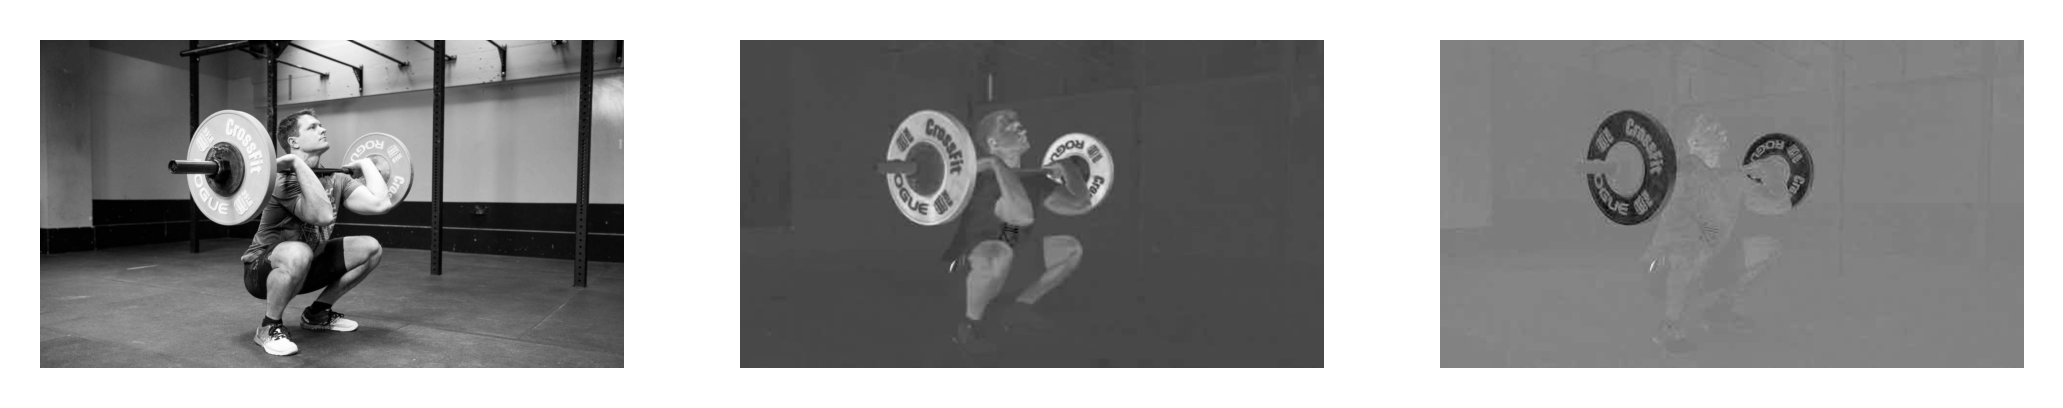

In [ ]:
# paso la imagen  DE RGB a YIQ

Y= 0.299*R  +0.587*G   +0.11*B
I= 0.596*R  -0.274*G   -0.322*B
Q= 0.211*R  -0.523*G   +0.312*B




fig, ax = plt.subplots(1, 3, dpi=400)
ax[0].imshow(Y, cmap='gray')
ax[0].set_axis_off()
print('ESPACIO Y, ESPACIO I, ESPACIO Q')
ax[1].imshow(I, cmap='gray')
ax[1].set_axis_off()
ax[2].imshow(Q, cmap='gray')
ax[2].set_axis_off()
plt.show()


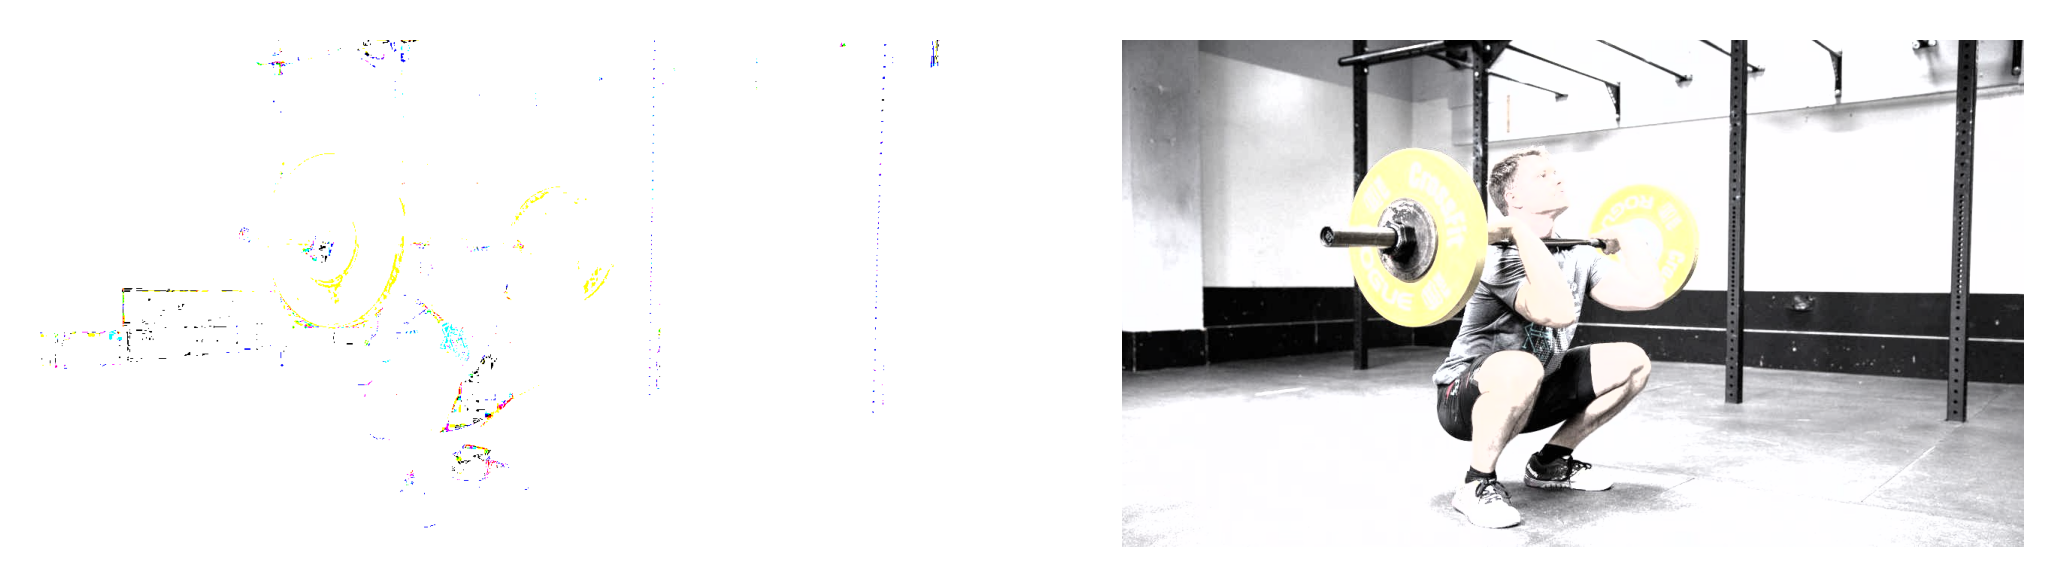

In [ ]:
 # MODIFICO INDEPENDIENTE EN YIQ _ LA ILUMINACIÓN (Y)

 #@title Alteración de los canales Y, I, Q mediante un factor. { run: "auto" }
factor_Y = 2.5 #@param {type:"slider", min:-5, max:10, step:0.1}
factor_IQ = 0.5 #@param {type:"slider", min:-5, max:10, step:0.1}


Y2 = Y * factor_Y



I2 = I * factor_IQ



Q2=  Q * factor_IQ


Y2=  np.clip(Y2, 0, 1)
I2= np.clip(I2,-0.5957,0.5957)
Q2= np.clip(Q2, -0.5226, 0.5226)
# PASO LA IMAGEN DE YIQ a RBG

RMOD=  (Y2 + 0.9663*I2 + 0.6210*Q2)*255
GMOD=  (Y2 - 0.2721*I2 - 0.6474*Q2)*255
BMOD=  (Y2 - 1.1070*I2 + 1.7046*Q2)*255

RMOD= np.clip(RMOD, 0,255)
GMOD= np.clip(GMOD, 0,255)
BMOD= np.clip(BMOD, 0,255)

imagen_modificada= np.copy(imagen)
imagen_modificada[:,:,0]= RMOD
imagen_modificada[:,:,1]= GMOD
imagen_modificada[:,:,2]= BMOD

imagen_modificada= imagen_modificada.astype('uint8')


fig, ax = plt.subplots(1, 2, dpi=400)
ax[0].imshow(imagen_original)
ax[0].set_axis_off()

ax[1].imshow(imagen_modificada)
ax[1].set_axis_off()


plt.show()

# Chequear que Y2 <= 1 (para que no se vaya de rango)
# Chequear -0.5957 < I2 < 0.5957
# Chequear 0.5226 < Q2 < 0.5226


#PARTE 2

pasos:
1. escogo una imagen
2. la paso a yiq
3. grafico y para cada una de las paletas de prueba:  https://matplotlib.org/stable/tutorials/colors/colormaps.html